
# COS SIN build a roller with perfect sin / cos shape. 

In this notebook we look to generate a template to create a roller. 
This will be used for the pumptrack. 


* https://en.wikipedia.org/wiki/Sine
* https://www.youtube.com/watch?v=Vw-RwPBWS8g
* https://www.geogebra.org/m/M27dtYDj
* http://tobiaspatternson.com/roller-calculator

# Notes:

So the youtube video gave me the information about shifting the graph around. 
The conversion of decimals to 1/16ths of an inch is something that I just figured out. 
I think i can take the infromation and save it in a spreadsheet. 
Eventually I can convert it to an svg with the right scale to be printed. 


# SVG writing later on. 
* https://svgwrite.readthedocs.io/en/latest/classes/shapes.html

In [1]:
import numpy as np
import matplotlib.pyplot as plot
import math

# Here is a function that rounds to the precision and base that we specify. 
"""
1/16 = 0.0625
"""

def round_to(x, prec=4, base=0.0625):
    rounded = round(base * round(float(x)/base),prec)
    return rounded

def round_to_numerator(x, prec=4, base=0.0625):
    
    rounded = round(base * round(float(x)/base),prec)
    return (round(rounded - math.trunc(x), prec) / base )
    

    
def generate_rollers():
    distance = 20
    height = 2
    x_in = distance * 12
    y_in = height * 12
    period = math.pi / (x_in/2)
    x_values = np.arange(0, x_in, 1 );

    # We use -cos to get the right graph. 
    cosamp = -(y_in/2) * (np.cos(period * x_values)) +(y_in/2)
    
    plot.title('Roller {}" tall over {}"'.format(y_in,x_in))
    plot.xlabel('Distance')
    plot.ylabel('Amplitude = cos(distance) shifted')
    plot.grid(True, which='both')
    
    plot.axhline(y=11.5, color='k')
    plot.axhline(y=23, color='k')
    plot.axvline(x=120)
    plot.axvline(x=60)
    plot.axvline(x=180)
#     plot.vline(y=11.5)
    
    plot.ylim(0,max(x_in, y_in))
    plot.xlim(0,max(x_in, y_in))

   
    # Plot the acutal graph.
    plot.plot(x_values, cosamp)
    
    svg_name = '{}_{}_roller.svg'.format(y_in,x_in)
    plot.savefig(svg_name, format="svg")
    plot.savefig(svg_name.replace('svg','pdf'), format='pdf')
    # Show the plot. 

    plot.show()
    
    # Let's get the data that we need to write out to the boards etc. 
    import pandas as pd 
    df = pd.DataFrame(cosamp)
    df.columns = ['dec']
    df.head()
    df['16ths-decimal'] = df.dec.apply(round_to)
    df['Inches']  = df.dec.apply(math.trunc)
    df['16ths-only'] = df.dec.apply(round_to_numerator)
    csv_name = svg_name.replace('svg','csv')
    df.to_csv(csv_name)
    
    return (svg_name,df,csv_name)
svg_name, df, csv_naem = generate_rollers()

<Figure size 640x480 with 1 Axes>

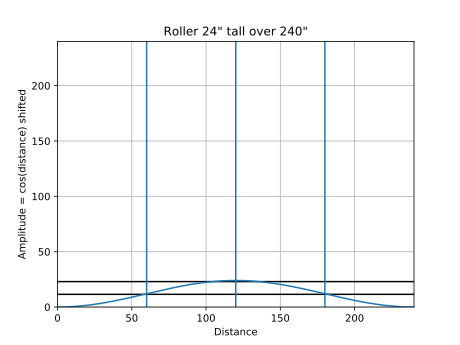

In [2]:
from IPython.display import SVG, display
display(SVG(svg_name))
# df.head(20)

In [3]:
!open 24_240_roller.pdf  

In [4]:
!ls *pdf

24_240_roller.pdf


In [6]:
!ls *csv

24_240_roller.csv



# Verbose for documentation. 


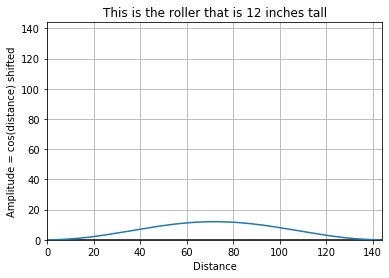

In [10]:
import numpy as np
import matplotlib.pyplot as plot
import math
# Get x values of the sine wave 
# We want to go from 0 to 12 feet, This is the range. 
# So if we calculate the y value should be from 0-1 
# However if we want to draw things correctly I think this needs to change. 

# Here we define the layout of the roller. 
# the distance and height in feet. 
distance = 12
height = 1

# Could just set these here. 
x_in = distance * 12
y_in = height * 12

# This was interesting to get the shift/perid.  y= A sin(Bx +C) + D
# A amplituid , B is the period sort of ( P = 2pi/ B) We solve for B. 
# B = pi/(distance/2)
# C = horizontal shift. 
# D = Vertical shift.  (Since we want a total of height of y_in we adjust the amplituide to 1/2 to get things to work.)

period = math.pi / (x_in/2)
x_values = np.arange(0, x_in, 1 );

# We use -cos to get the right graph. 
cosamp = -(y_in/2) * (np.cos(period * x_values)) +(y_in/2)


# Give a title for the sine wave plot
plot.title('This is the roller that is {} inches tall'.format(y_in))

# Give x axis label for the sine wave plot
plot.xlabel('Distance')

# Give y axis label for the sine wave plot
plot.ylabel('Amplitude = cos(distance) shifted')

plot.grid(True, which='both')

plot.axhline(y=0, color='k')

# Setting the limits for the chart. 
plot.ylim(0,144)
plot.xlim(0,144)

# Plot the acutal graph.
plot.plot(x_values, cosamp)
plot.savefig("test.svg", format="svg")

# Show the plot. 

plot.show()

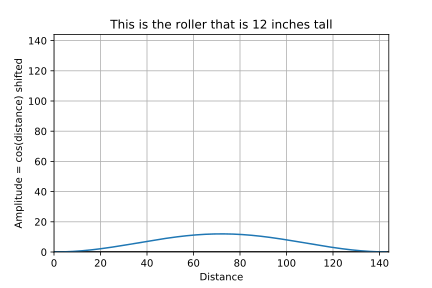

In [11]:
from IPython.display import SVG, display
display(SVG('test.svg'))

In [12]:
# Let's get the data that we need to write out to the boards etc. 
import pandas as pd 
df = pd.DataFrame(cosamp)
df.columns = ['dec']
df.head()

,dec
0,0.000000
1,0.005711
2,0.022832
3,0.051331
4,0.091153


In [13]:
df['16ths-decimal'] = df.dec.apply(round_to)
df['Inches']  = df.dec.apply(math.trunc)
df['16ths-only'] = df.dec.apply(round_to_numerator)
df.to_clipboard()

In [14]:
# Goal here is to get the measurements that we can draw on a board and cutout the design. 
denominator = 16
fraction = 1/denominator
print(fraction)
number = 7.8

print(number)
print('remainder ',number % fraction )
print('number', (number // fraction)/8)
# So since we have the remainder this is what it would be.



0.0625
7.8
remainder  0.04999999999999982
number 15.5


In [15]:
for j,i in enumerate(range(16)):
    print(j, i * (1/16))

0 0.0
1 0.0625
2 0.125
3 0.1875
4 0.25
5 0.3125
6 0.375
7 0.4375
8 0.5
9 0.5625
10 0.625
11 0.6875
12 0.75
13 0.8125
14 0.875
15 0.9375


In [22]:
# Go through the measurements. 

# for i, y_value in enumerate(cosamp):
#     if(i % 3 == 0):
#         print(i, y_value)

In [43]:
import svgwrite

dwg = svgwrite.Drawing('test.svg', profile='full', size=(1000,1000))
dwg.add(dwg.line((10, 100), (100, 10), stroke=svgwrite.rgb(10, 10, 16, '%')))
dwg.add(dwg.text('This is another test', insert=(0, 10), fill='red'))
dwg.save()


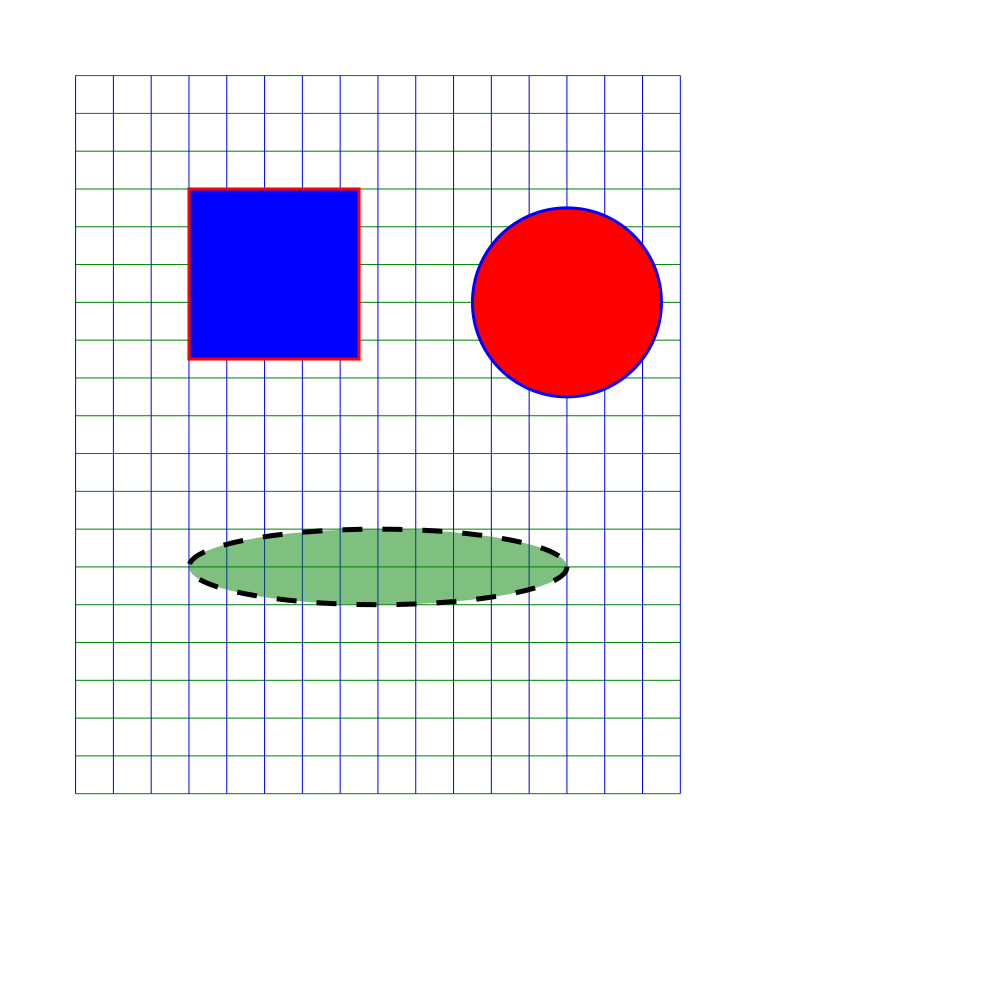

In [49]:
#https://svgwrite.readthedocs.io/en/latest/classes/shapes.html#polyline
import svgwrite
from svgwrite import cm, mm   

test_file = 'basic_shapes.svg'
def basic_shapes(name):
    dwg = svgwrite.Drawing(filename=name, debug=True, size=(1000,1000))
    hlines = dwg.add(dwg.g(id='hlines', stroke='green'))
    for y in range(20):
        hlines.add(dwg.line(start=(2*cm, (2+y)*cm), end=(18*cm, (2+y)*cm)))
    vlines = dwg.add(dwg.g(id='vline', stroke='blue'))
    for x in range(17):
        vlines.add(dwg.line(start=((2+x)*cm, 2*cm), end=((2+x)*cm, 21*cm)))
    shapes = dwg.add(dwg.g(id='shapes', fill='red'))

    # set presentation attributes at object creation as SVG-Attributes
    circle = dwg.circle(center=(15*cm, 8*cm), r='2.5cm', stroke='blue', stroke_width=3)
    circle['class'] = 'class1 class2'
    shapes.add(circle)

    # override the 'fill' attribute of the parent group 'shapes'
    shapes.add(dwg.rect(insert=(5*cm, 5*cm), size=(45*mm, 45*mm),
                        fill='blue', stroke='red', stroke_width=3))

    # or set presentation attributes by helper functions of the Presentation-Mixin
    ellipse = shapes.add(dwg.ellipse(center=(10*cm, 15*cm), r=('5cm', '10mm')))
    ellipse.fill('green', opacity=0.5).stroke('black', width=5).dasharray([20, 20])
    
    
    dwg.save()

basic_shapes(test_file)
display(SVG(test_file))

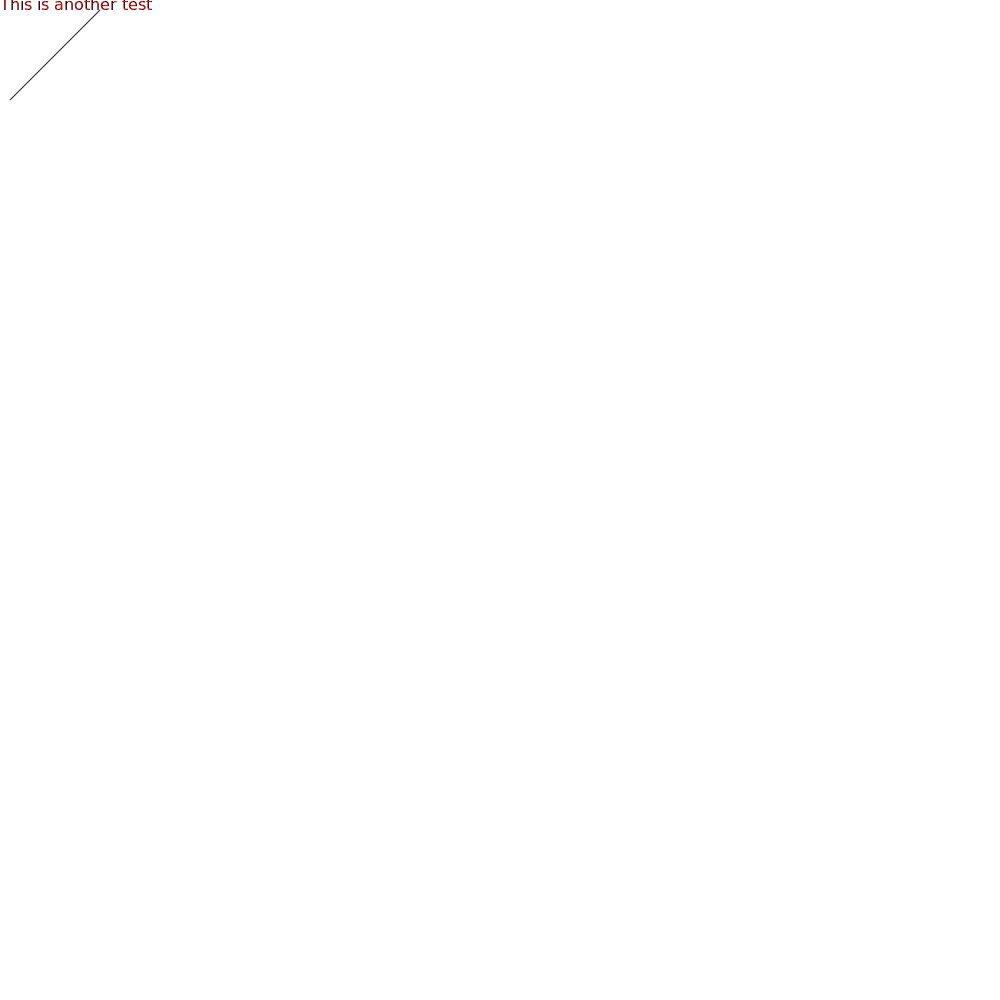

In [45]:
from IPython.display import SVG, display
display(SVG('test.svg'))

In [30]:
!open test.svg